<a href="https://colab.research.google.com/github/ManelSoengas/Machine_learning/blob/main/Workbench_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://realpython.com/python-keras-text-classification/
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#examples-using-sklearn-feature-extraction-text-countvectorizer

In [ ]:
import pandas as pd

filepath_dict = {'yelp':   '/content/yelp_labelled.txt',
                 'amazon': '/content/amazon_cells_labelled.txt',
                 'imdb':   '/content/imdb_labelled.txt'}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence', 'label'], sep='\t')
    df['source'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
print(df.iloc[10])

sentence    Service was very prompt.
label                              1
source                          yelp
Name: 10, dtype: object


In [ ]:
df.head(10)

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp
5,Now I am getting angry and I want my damn pho.,0,yelp
6,Honeslty it didn't taste THAT fresh.),0,yelp
7,The potatoes were like rubber and you could te...,0,yelp
8,The fries were great too.,1,yelp
9,A great touch.,1,yelp


# **Get from the characteristics of the data set.**


---
The data is not preprocessed. Option that may be necessary, previously, and that is subject to the type of data (tweets, text, reviews, ratings, etc.).


In [ ]:
from sklearn.model_selection import train_test_split

#df_yelp = df[df['source'] == 'yelp']

sentences = df['sentence'].values
y = df['label'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<2061x4506 sparse matrix of type '<class 'numpy.int64'>'
	with 23280 stored elements in Compressed Sparse Row format>

# **Each word is prepresented by its index**

---



In [ ]:
vectorizer.vocabulary_

{'rather': 3144,
 'eat': 1268,
 'airline': 142,
 'food': 1590,
 'seriously': 3483,
 'there': 3959,
 'was': 4331,
 'warm': 4324,
 'feeling': 1491,
 'with': 4426,
 'the': 3948,
 'service': 3489,
 'and': 183,
 'felt': 1499,
 'like': 2299,
 'their': 3952,
 'guest': 1791,
 'for': 1597,
 'special': 3689,
 'treat': 4079,
 'fantastic': 1467,
 'earphones': 1258,
 'we': 4354,
 'started': 3729,
 'tuna': 4115,
 'sashimi': 3380,
 'which': 4384,
 'brownish': 524,
 'in': 2023,
 'color': 771,
 'obviously': 2686,
 'wasn': 4333,
 'fresh': 1633,
 'great': 1762,
 'phone': 2894,
 'highly': 1898,
 'recommended': 3190,
 'jabra': 2132,
 'eargels': 1254,
 'fit': 1541,
 'my': 2596,
 'ears': 1261,
 'very': 4267,
 'well': 4371,
 'don': 1172,
 'buy': 558,
 'this': 3972,
 'product': 3046,
 'you': 4490,
 'won': 4435,
 'forget': 1605,
 'movie': 2573,
 'rating': 3145,
 '10': 1,
 'grade': 1751,
 'note': 2669,
 'show': 3540,
 'is': 2120,
 'so': 3635,
 'bad': 322,
 'that': 3946,
 'even': 1370,
 'mother': 2560,
 'of': 269

The magnitude of appearance of the word in the dictionary.

In [ ]:
vectorizer.transform(sentences_train).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# **Base line**


---

Reference model to compare it with other more advanced models.
Two simple algorithms are used, random forest and logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.8195050946142649


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf_classifier = RandomForestClassifier()

# Training
rf_classifier.fit(X_train, y_train)

# Evaluation
rf_score = rf_classifier.score(X_test, y_test)

print("Accuracy:", rf_score)


Accuracy: 0.8064046579330422


# **Deep neural networks**


---



In [ ]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
 model.compile(loss='binary_crossentropy',
             optimizer='adam',
            metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                45070     
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 45081 (176.10 KB)
Trainable params: 45081 (176.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_train.shape[0]

2061

In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Epoch 1/100
207/207 [==============================] - 15s 65ms/step - loss: 0.6640 - accuracy: 0.6812 - val_loss: 0.6021 - val_accuracy: 0.7918
Epoch 2/100
207/207 [==============================] - 5s 24ms/step - loss: 0.5094 - accuracy: 0.8583 - val_loss: 0.5208 - val_accuracy: 0.8166
Epoch 3/100
207/207 [==============================] - 2s 9ms/step - loss: 0.3619 - accuracy: 0.9345 - val_loss: 0.4642 - val_accuracy: 0.8268
Epoch 4/100
207/207 [==============================] - 3s 16ms/step - loss: 0.2607 - accuracy: 0.9588 - val_loss: 0.4338 - val_accuracy: 0.8297
Epoch 5/100
207/207 [==============================] - 2s 10ms/step - loss: 0.1915 - accuracy: 0.9704 - val_loss: 0.4173 - val_accuracy: 0.8282
Epoch 6/100
207/207 [==============================] - 2s 10ms/step - loss: 0.1456 - accuracy: 0.9753 - val_loss: 0.4154 - val_accuracy: 0.8311
Epoch 7/100
207/207 [==============================] - 2s 11ms/step - loss: 0.1128 - accuracy: 0.9869 - val_loss: 0.4180 - val_accuracy:

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=1)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Testing Accuracy:  {:.4f}".format(accuracy))

65/65 [==============================] - 0s 3ms/step - loss: 2.4361e-06 - accuracy: 1.0000
Training Accuracy: 1.0000
22/22 [==============================] - 0s 3ms/step - loss: 1.9112 - accuracy: 0.7977
Testing Accuracy:  0.7977


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']  # Cambiar 'acc' a 'accuracy'
    val_acc = history.history['val_accuracy']  # Cambiar 'val_acc' a 'val_accuracy'
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()




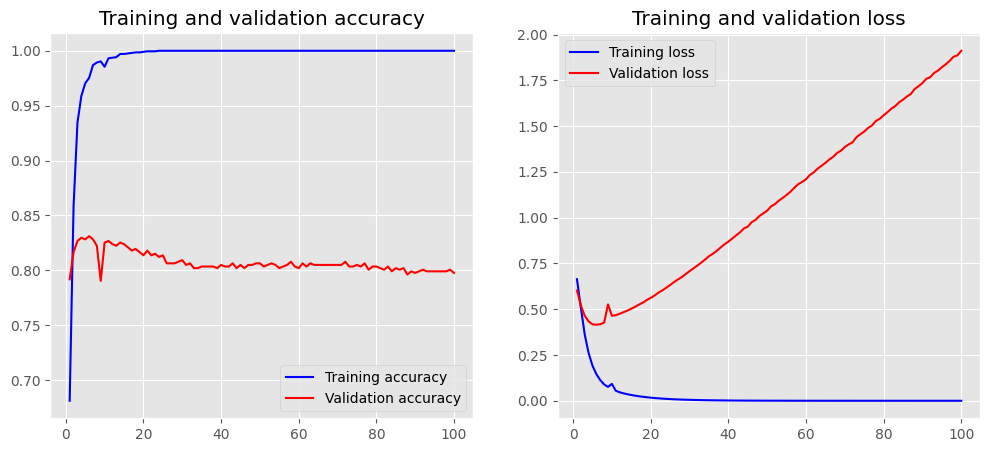

In [ ]:
plot_history(history)